# Seaborn

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Library documentation: <a>http://stanford.edu/~mwaskom/software/seaborn/</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Themes

In [2]:
# global config settings to control things like style, font size, color palette etc.
sb.set(context="notebook", style="darkgrid", palette="dark")

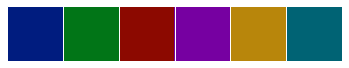

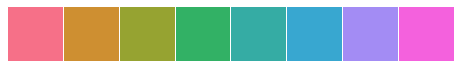

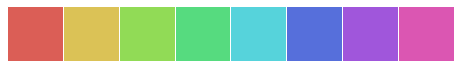

In [3]:
# seaborn has some nice built-in color palette features
sb.palplot(sb.color_palette())
sb.palplot(sb.color_palette("husl", 8))
sb.palplot(sb.color_palette("hls", 8))

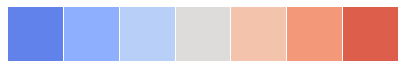

In [4]:
# matplotlib colormap of evenly spaced colors
sb.palplot(sb.color_palette("coolwarm", 7))

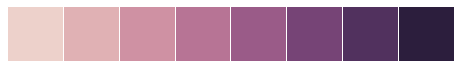

In [5]:
# sequential palette with linear increase in brightness
sb.palplot(sb.cubehelix_palette(8))

In [6]:
gammas = pd.read_csv('../data/gammas.csv')
gammas.head()

,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433
1,0.0,IPS,1,-0.414368
2,0.0,IPS,2,0.214695
3,0.0,IPS,3,0.814809
4,0.0,IPS,4,-0.894992


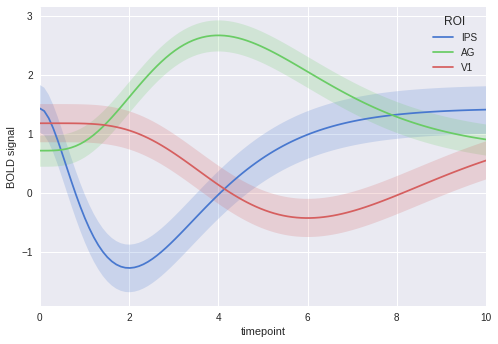

In [7]:
# palettes are used in a plot via the color paramter
sb.tsplot(gammas, "timepoint", "subject", "ROI", "BOLD signal", color="muted")

### Advanced Plots

In [8]:
tips = pd.read_csv("../data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


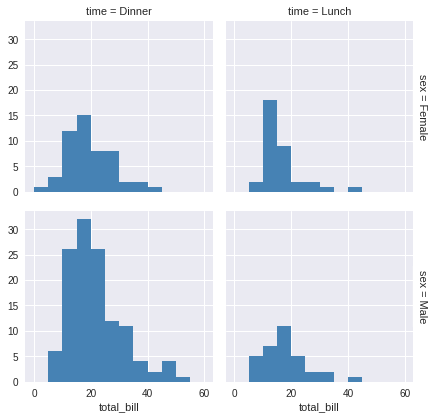

In [9]:
# facetting histograms by subsets of data
sb.set(style="darkgrid")

g = sb.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)

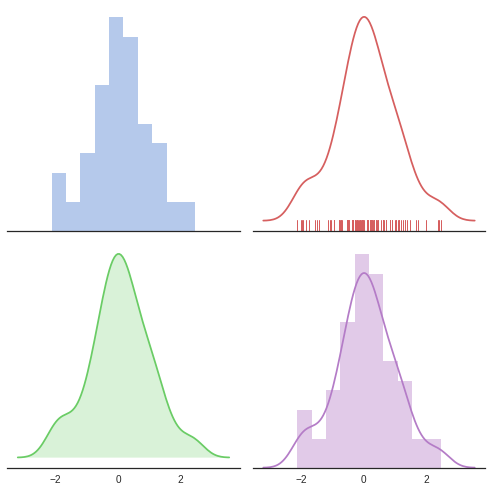

In [10]:
# several distribution plot examples
sb.set(style="white", palette="muted")
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.despine(left=True)

rs = np.random.RandomState(10)

b, g, r, p = sb.color_palette("muted", 4)

d = rs.normal(size=100)

sb.distplot(d, kde=False, color=b, ax=axes[0, 0])
sb.distplot(d, hist=False, rug=True, color=r, ax=axes[0, 1])
sb.distplot(d, hist=False, color=g, kde_kws={"shade": True}, ax=axes[1, 0])
sb.distplot(d, color=p, ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

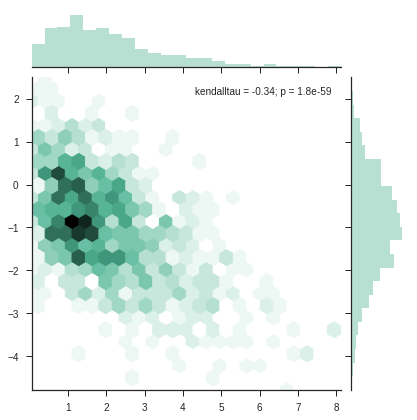

In [11]:
# hexbin plot with marginal distributions
from scipy.stats import kendalltau
sb.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)
sb.jointplot(x, y, kind="hex", stat_func=kendalltau, color="#4CB391")

In [12]:
df = pd.read_csv("../data/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


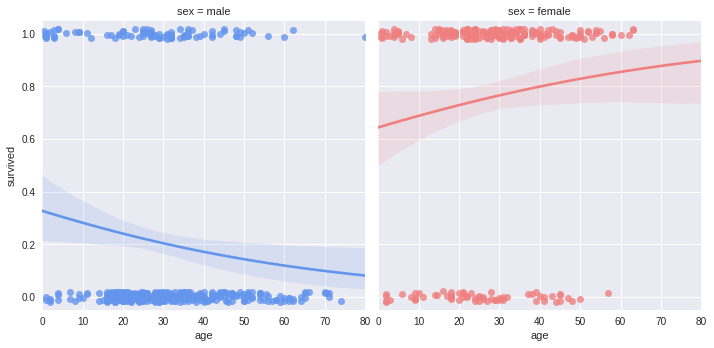

In [13]:
# faceted logistic regression
sb.set(style="darkgrid")

pal = dict(male="#6495ED", female="#F08080")
g = sb.lmplot("age", "survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

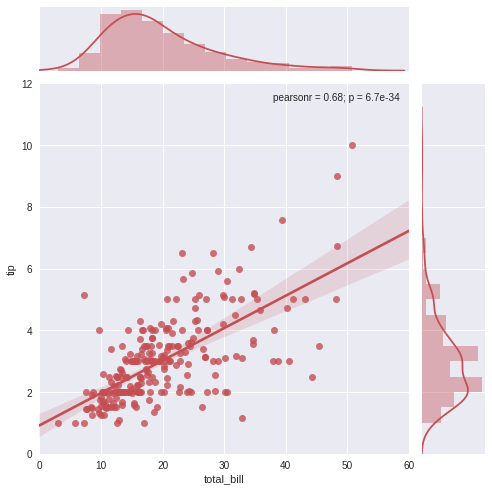

In [14]:
# linear regression with marginal distributions
sb.set(style="darkgrid")
color = sb.color_palette()[2]
g = sb.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color=color, size=7)

In [15]:
planets = pd.read_csv("../data/planets.csv")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


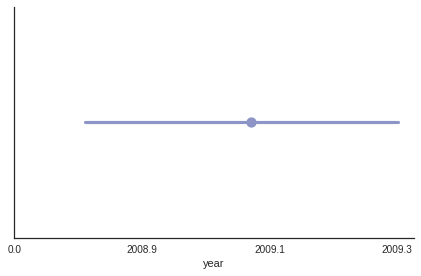

In [16]:
# time series factor plot
sb.set(style="white")

years = np.arange(2000, 2015)
g = sb.factorplot("year", data=planets, palette="BuPu",
                   aspect=1.5, order=years)
g.set_xticklabels(step=2)

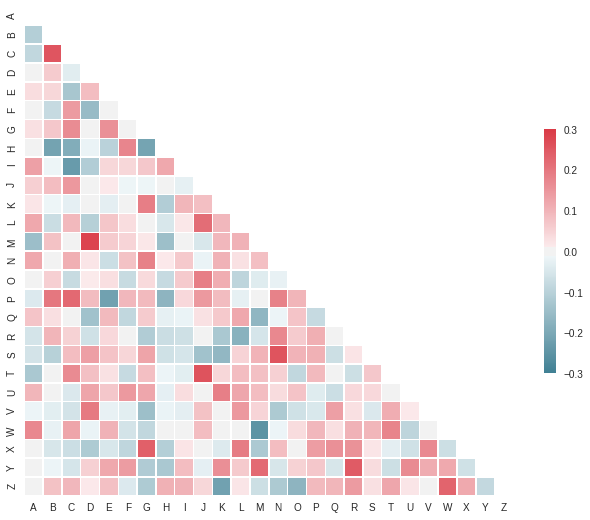

In [17]:
from string import ascii_letters

sb.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
df = pd.read_csv("../data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


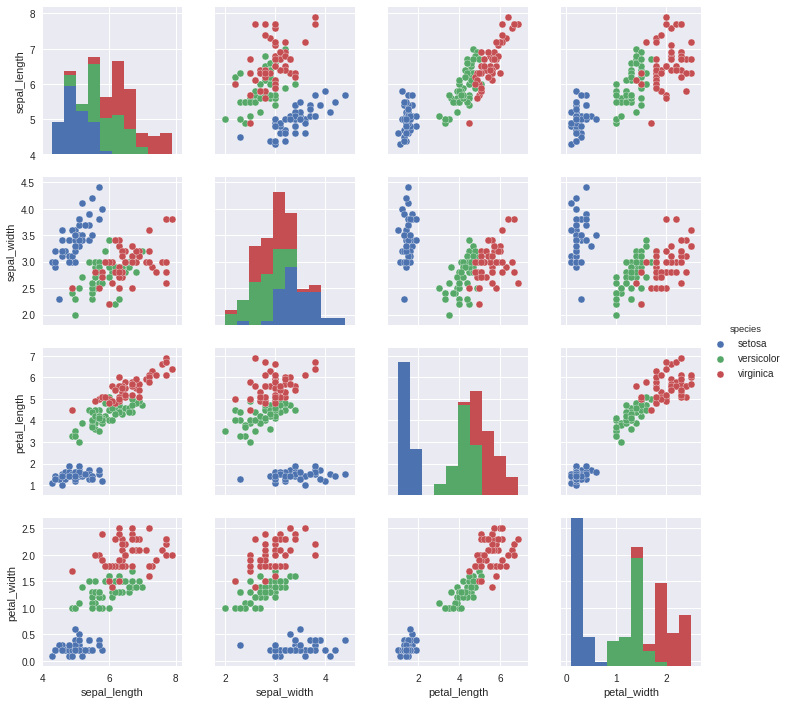

In [19]:
# pair plot example
sb.set(style="darkgrid")

sb.pairplot(df, hue="species", size=2.5)